### NCF, Stacks, & Dispersion Visualization

In [1]:
# Import necessary dependencies
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('..')
from src.plot import (
    plot_fv_panel,
    plot_fv_with_pick,
    plot_pick_curve,
    plot_fv_panel_plotly,
    plot_fv_with_pick_plotly)

from src.utils import convert_to_numpy

In [2]:
# Define paths
ncf_raw     = '../data/ncf_raw/20210901_001000_cc_000.npy'
ncf_daily   = '../data/ncf_stacks/daily/20210901_daily.npy'
base = '20210901_daily'

# Load data
ncf_raw_ = np.load(ncf_raw)
ncf_daily_ = np.load(ncf_daily)
fv = np.load(f'../results/dispersion/daily/{base}_fv_panel.npy')
f_axis = np.load(f'../results/dispersion/daily/{base}_f_axis.npy')
v_axis = np.load(f'../results/dispersion/daily/{base}_v_axis.npy')
pick = np.load(f'../results/dispersion/daily/{base}_pick.npy')

In [3]:
fv = np.load(f"../results/dispersion/daily/{base}_fv_panel.npy")
f_axis = np.load(f"../results/dispersion/daily/{base}_f_axis.npy")
v_axis = np.load(f"../results/dispersion/daily/{base}_v_axis.npy")
pick = np.load(f"../results/dispersion/daily/{base}_pick.npy")

In [4]:
# Define parameters
dt = 0.004      # sampling rate in sec (or 250 Hz)
fs = 250        # sampling frequency (Hz)

# Max lag and sample rate
max_lag = 1.0   # seconds (as set)
npts_lag = int(max_lag * fs)

# Cable configuration
first_chan = 399
last_chan = 748
dx = 8.16 # `chann_len` in meters
channels = np.arange(first_chan, last_chan + 1)

#### 1. Raw NCF

In [5]:
# Extract metadata
n_rec, n_lags = ncf_raw_.shape

# Lag axis spans from –max_lag … +max_lag
lag_axis = np.linspace(-max_lag, +max_lag, n_lags)

if len(channels) != n_rec:
    channels = np.arange(n_rec)

distance_axis = (channels - channels[0]) * dx

In [6]:
# Extract ncf data
print(f'Receiver channels: {n_rec}')
print(f'Lag dimension: {n_lags} samples → {2 * max_lag:.3f} s total window')
print(f'Processed sampling rate: {fs:.1f} Hz → dt_proc = {dt:.4f} s')
print(f'Lag axis (first/last): {lag_axis[0]:.3f} s, {lag_axis[-1]:.3f} s')
print('NCF data shape:', ncf_raw_.shape)

Receiver channels: 350
Lag dimension: 501 samples → 2.000 s total window
Processed sampling rate: 250.0 Hz → dt_proc = 0.0040 s
Lag axis (first/last): -1.000 s, 1.000 s
NCF data shape: (350, 501)


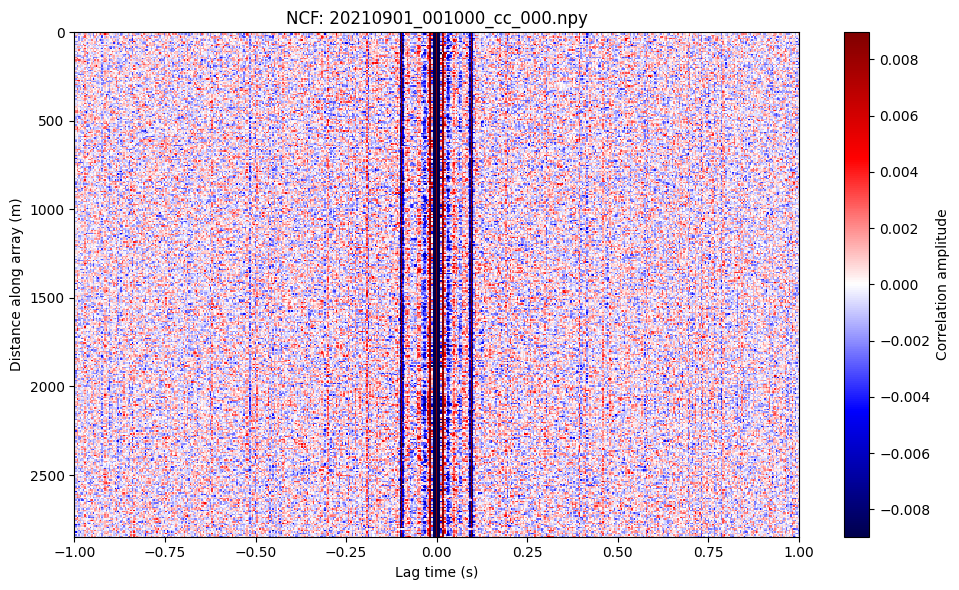

In [7]:
# Compute clipping value to avoid extreme outliers in the colormap
pclip = 99
ncf_clip = np.percentile(ncf_raw_, pclip)

# Plot NCF
plt.figure(figsize=(10, 6))

img = plt.imshow(ncf_raw_,
                 extent=[lag_axis[0], lag_axis[-1], distance_axis[-1], distance_axis[0]],
                 aspect='auto',
                 cmap='seismic', 
                 vmin=-ncf_clip, vmax=ncf_clip, 
                 interpolation='nearest')

plt.colorbar(img, label='Correlation amplitude')
plt.xlabel('Lag time (s)')
plt.ylabel('Distance along array (m)')
plt.title(f'NCF: {os.path.basename(ncf_raw)}')
plt.tight_layout()
plt.show()

#### 2. Daily Stacked NCF

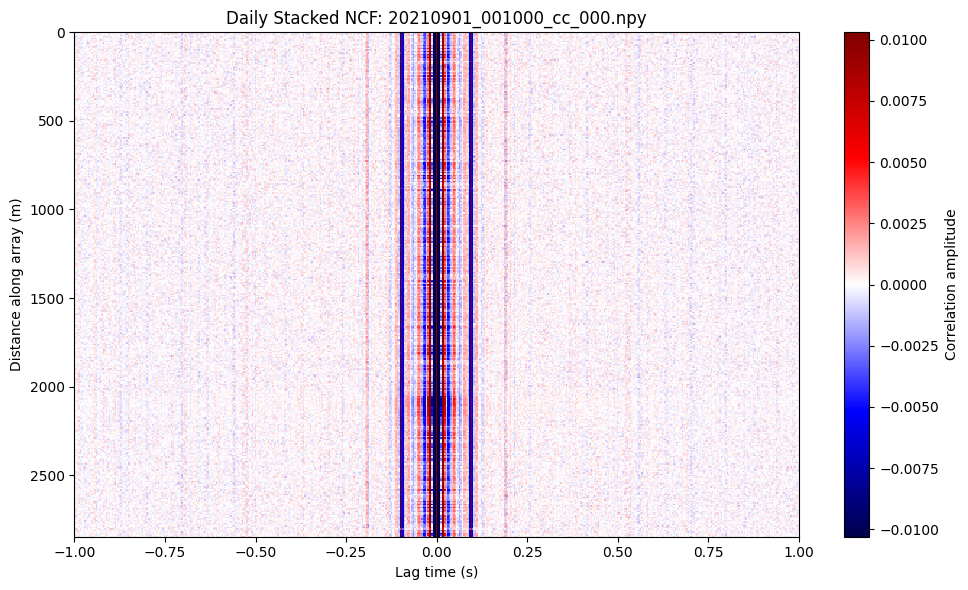

In [8]:
ncf_daily_clip = np.percentile(ncf_daily_, pclip)

plt.figure(figsize=(10, 6))

img = plt.imshow(ncf_daily_,
                 extent=[lag_axis[0], lag_axis[-1], distance_axis[-1], distance_axis[0]],
                 aspect='auto',
                 cmap='seismic', 
                 vmin=-ncf_daily_clip, vmax=ncf_daily_clip, 
                 interpolation='nearest')

plt.colorbar(img, label='Correlation amplitude')
plt.xlabel('Lag time (s)')
plt.ylabel('Distance along array (m)')
plt.title(f'Daily Stacked NCF: {os.path.basename(ncf_raw)}')
plt.tight_layout()
plt.show()

#### 3. Dispersion Images

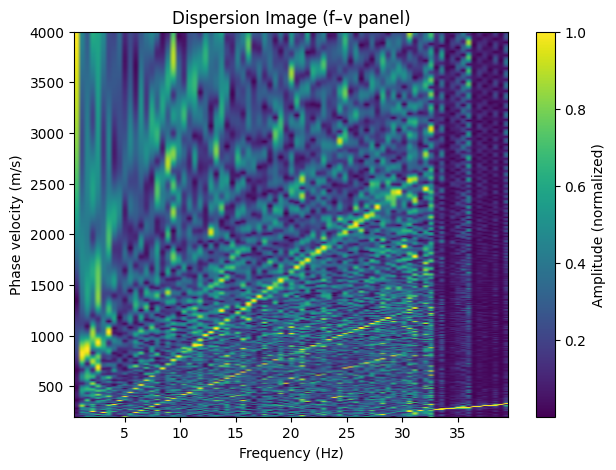

(<Figure size 700x500 with 2 Axes>,
 <Axes: title={'center': 'Dispersion Image (f–v panel)'}, xlabel='Frequency (Hz)', ylabel='Phase velocity (m/s)'>)

In [9]:
# 1. f-v panel
plot_fv_panel(fv, f_axis, v_axis)

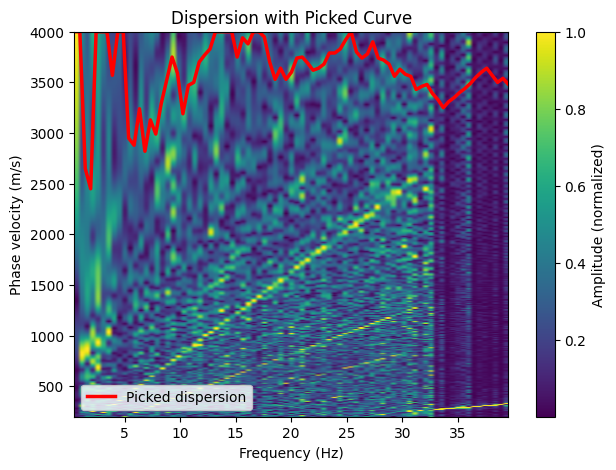

(<Figure size 700x500 with 2 Axes>,
 <Axes: title={'center': 'Dispersion with Picked Curve'}, xlabel='Frequency (Hz)', ylabel='Phase velocity (m/s)'>)

In [10]:
# 2. f-v + pick
plot_fv_with_pick(fv, f_axis, v_axis, pick)

In [11]:
# 3. Interactive f-v panel
plot_fv_panel_plotly(fv, f_axis, v_axis, title='Daily f–v Panel', show=False)